In [ ]:
import numpy as np
import cv2
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.layers import Conv2D, Flatten, MaxPooling2D,Dense,Dropout,SpatialDropout2D
from keras.models  import Sequential
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img
import random,os,glob
import matplotlib.pyplot as plt

In [ ]:
dir_path = '/content/drive/MyDrive/project_attempt_1'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
img_list = glob.glob(os.path.join(dir_path, '*/*.jpg'))

In [ ]:
len(img_list)

4283

In [ ]:
train=ImageDataGenerator(horizontal_flip=True,
                         vertical_flip=True,
                         validation_split=0.2,
                         rescale=1./255,
                         rotation_range=40,
                         fill_mode='nearest',
                         shear_range = 0.2,
                         zoom_range = 0.2,
                         width_shift_range = 0.2,
                         height_shift_range = 0.2,
                          brightness_range = (0.5, 1.5))

test=ImageDataGenerator(rescale=1./255,
                        validation_split=0.2)

train_generator=train.flow_from_directory(dir_path,
                                          target_size=(300,300),
                                          batch_size=32,
                                          class_mode='categorical',
                                          subset='training')

test_generator=test.flow_from_directory(dir_path,
                                        target_size=(300,300),
                                        batch_size=32,
                                        class_mode='categorical',
                                        subset='validation')

labels = (train_generator.class_indices)
print(labels)

labels = dict((v,k) for k,v in labels.items())
print(labels)

Found 3428 images belonging to 5 classes.
Found 855 images belonging to 5 classes.
{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4}
{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic'}


In [ ]:
for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape

((32, 300, 300, 3), (32, 5))

In [ ]:
print (train_generator.class_indices)

Labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('labels.txt', 'w') as f:
  f.write(Labels)

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4}


In [ ]:
model=Sequential()
#Convolution blocks

model.add(Conv2D(32,(3,3), padding='same',input_shape=(300,300,3),activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 
#model.add(SpatialDropout2D(0.5)) # No accuracy

model.add(Conv2D(32,(3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 
#model.add(SpatialDropout2D(0.5))

model.add(Conv2D(64,(3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 

model.add(Conv2D(64,(3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(128,(3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))


#model.add(SpatialDropout2D(0.5))


#Classification layers
model.add(Flatten())

model.add(Dense(64,activation='relu'))
#model.add(SpatialDropout2D(0.5))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(5,activation='softmax'))

filepath="project_attempt_3.h5"
checkpoint1 = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
checkpoint2 = EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 50, 
                                        restore_best_weights = True)
callbacks_list = [checkpoint1, checkpoint2]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 150, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 37, 37, 64)       0

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc']) # RMS PROP - No accuracy

#es=EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

In [ ]:
history = model.fit_generator(train_generator,
                              epochs=150,
                              steps_per_epoch=2276//32,
                              validation_data=test_generator,
                              validation_steps=251//32,
                              workers = 4,
                              callbacks=callbacks_list) 
#41 epoch - 75% #73- 76.9%
#78 epoch - 80%

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/150
71/71 [==============================] - ETA: 0s - loss: 1.5421 - acc: 0.2959
Epoch 1: val_acc improved from -inf to 0.38393, saving model to project_attempt_3.h5
71/71 [==============================] - 354s 5s/step - loss: 1.5421 - acc: 0.2959 - val_loss: 1.3900 - val_acc: 0.3839
Epoch 2/150
71/71 [==============================] - ETA: 0s - loss: 1.4115 - acc: 0.3724
Epoch 2: val_acc improved from 0.38393 to 0.45089, saving model to project_attempt_3.h5
71/71 [==============================] - 358s 5s/step - loss: 1.4115 - acc: 0.3724 - val_loss: 1.3860 - val_acc: 0.4509
Epoch 3/150
71/71 [==============================] - ETA: 0s - loss: 1.3677 - acc: 0.4062
Epoch 3: val_acc did not improve from 0.45089
71/71 [==============================] - 345s 5s/step - loss: 1.3677 - acc: 0.4062 - val_loss: 1.4465 - val_acc: 0.3304
Epoch 4/150
71/71 [==============================] - ETA: 0s - loss: 1.3454 - acc: 0.4149
Epoch 4: val_acc did not improve from 0.45089
71/71 [========

KeyboardInterrupt: ignored

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/project_attempt_3_80.h5')
import matplotlib.pyplot as plt

Maximum Probability:  0.93289423
Classified: plastic


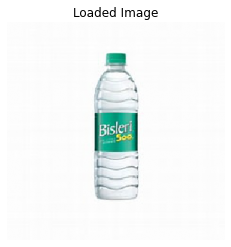

In [ ]:
from keras.preprocessing import image

img_path = '/content/drive/MyDrive/validation_images/bisleri.jpg'

img = image.load_img(img_path, target_size=(300, 300))
img = image.img_to_array(img, dtype=np.uint8)
img=np.array(img)/255.0

plt.title("Loaded Image")
plt.axis('off')
plt.imshow(img.squeeze())

p=model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Maximum Probability: ",np.max(p[0], axis=-1))
predicted_class = labels[np.argmax(p[0], axis=-1)]
print("Classified:",predicted_class)


-------------------Individual Probability--------------------------------

CARDBOARD : 0.26 %
GLASS : 3.7 %
METAL : 1.7 %
PAPER : 1.05 %
PLASTIC : 93.29 %


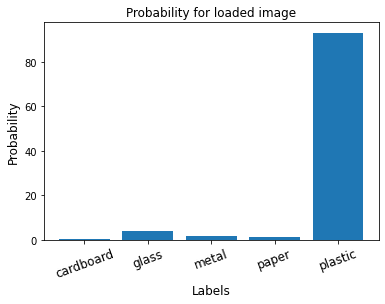

In [ ]:

classes=[]
prob=[]
print("\n-------------------Individual Probability--------------------------------\n")

for i,j in enumerate (p[0],0):
    print(labels[i].upper(),':',round(j*100,2),'%')
    classes.append(labels[i])
    prob.append(round(j*100,2))
    
def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(len(classes))
    plt.bar(index, prob)
    plt.xlabel('Labels', fontsize=12)
    plt.ylabel('Probability', fontsize=12)
    plt.xticks(index, classes, fontsize=12, rotation=20)
    plt.title('Probability for loaded image')
    plt.show()
plot_bar_x()

In [ ]:

from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path, target_size = (300,300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 1)
  print(classes)
  
  



(1, 300, 300, 3)


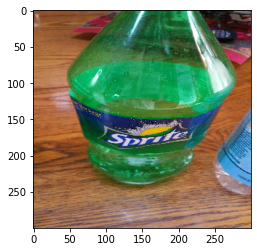

In [ ]:
from keras.preprocessing import image
import numpy as np
image_path = '/content/drive/MyDrive/validation_images/sprite_2.jpg'
  
# Pre-processing the image
img = image.load_img(image_path, target_size = (300, 300))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis = 0)
img_tensor = img_tensor / 255.
  
# Print image tensor shape
print(img_tensor.shape)
  
# Print image
from google.colab import files
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

(1, 300, 300, 32)


<Figure size 432x288 with 0 Axes>

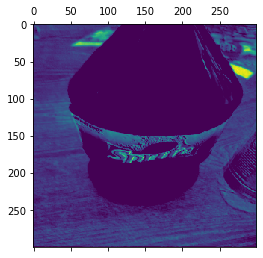

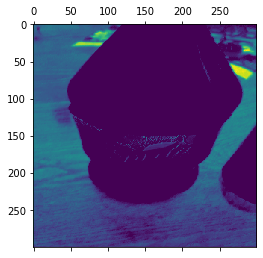

In [ ]:
from keras import models
from keras import layers
# Outputs of the 8 layers, which include conv2D and max pooling layers
layer_outputs = [layer.output for layer in model.layers[:10]]
activation_model = models.Model(inputs = model.input, outputs = layer_outputs)
activations = activation_model.predict(img_tensor)
test = plt.figure()  
# Getting Activations of first layer
first_layer_activation = activations[0]
  
# shape of first layer activation
print(first_layer_activation.shape)
  
# 6th channel of the image after first layer of convolution is applied
plt.matshow(first_layer_activation[0, :, :, 1], cmap ='viridis')

# 15th channel of the image after first layer of convolution is applied
plt.matshow(first_layer_activation[0, :, :, 31], cmap ='viridis')





(1, 150, 150, 32)


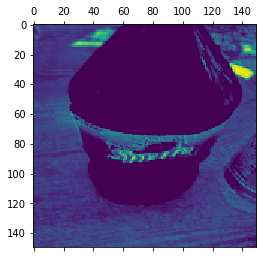

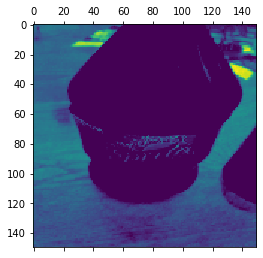

In [ ]:
second_layer_activation = activations[1]
  
# shape of first layer activation
print(second_layer_activation.shape)
  
# 6th channel of the image after first layer of convolution is applied
plt.matshow(second_layer_activation[0, :, :, 1], cmap ='viridis')
  
# 15th channel of the image after first layer of convolution is applied
plt.matshow(second_layer_activation[0, :, :, 31], cmap ='viridis')

(1, 150, 150, 32)


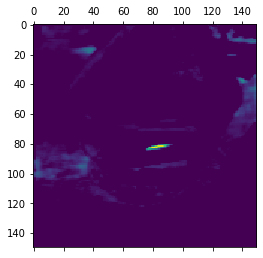

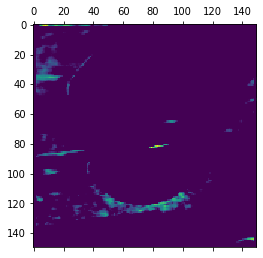

In [ ]:
third_layer_activation = activations[2]
  
# shape of first layer activation
print(third_layer_activation.shape)
  
# 6th channel of the image after first layer of convolution is applied
plt.matshow(third_layer_activation[0, :, :, 1], cmap ='viridis')
  
# 15th channel of the image after first layer of convolution is applied
plt.matshow(third_layer_activation[0, :, :, 31], cmap ='viridis')

(1, 75, 75, 32)


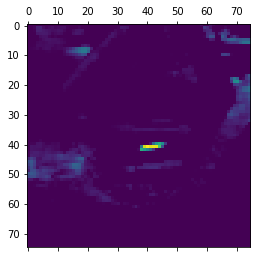

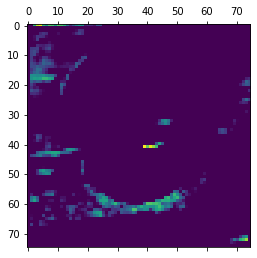

In [ ]:
four_layer_activation = activations[3]
  
# shape of first layer activation
print(four_layer_activation.shape)
  
# 6th channel of the image after first layer of convolution is applied
plt.matshow(four_layer_activation[0, :, :, 1], cmap ='viridis')
  
# 15th channel of the image after first layer of convolution is applied
plt.matshow(four_layer_activation[0, :, :, 31], cmap ='viridis')

(1, 75, 75, 64)


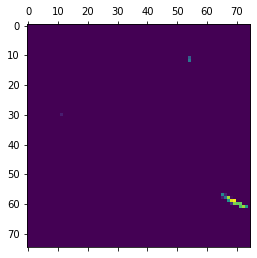

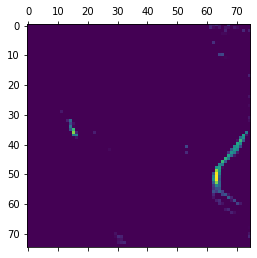

In [ ]:
five_layer_activation = activations[4]
  
# shape of first layer activation
print(five_layer_activation.shape)
  
# 6th channel of the image after first layer of convolution is applied
plt.matshow(five_layer_activation[0, :, :, 1], cmap ='viridis')
  
# 15th channel of the image after first layer of convolution is applied
plt.matshow(five_layer_activation[0, :, :, 63], cmap ='viridis')

(1, 37, 37, 64)


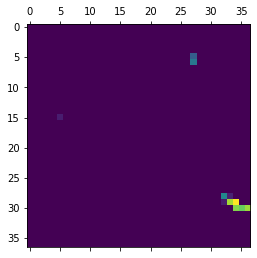

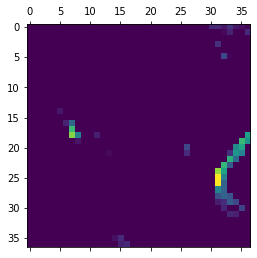

In [ ]:
six_layer_activation = activations[5]
  
# shape of first layer activation
print(six_layer_activation.shape)
  
# 6th channel of the image after first layer of convolution is applied
plt.matshow(six_layer_activation[0, :, :, 1], cmap ='viridis')
  
# 15th channel of the image after first layer of convolution is applied
plt.matshow(six_layer_activation[0, :, :, 63], cmap ='viridis')

(1, 37, 37, 64)


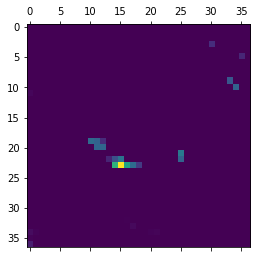

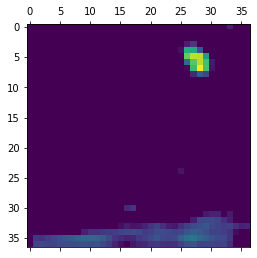

In [ ]:
seven_layer_activation = activations[6]
  
# shape of first layer activation
print(seven_layer_activation.shape)
  
# 6th channel of the image after first layer of convolution is applied
plt.matshow(seven_layer_activation[0, :, :, 1], cmap ='viridis')
  
# 15th channel of the image after first layer of convolution is applied
plt.matshow(seven_layer_activation[0, :, :, 63], cmap ='viridis')

(1, 18, 18, 64)


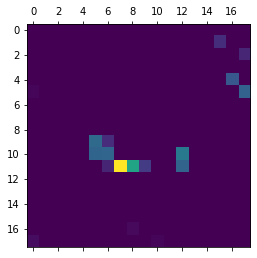

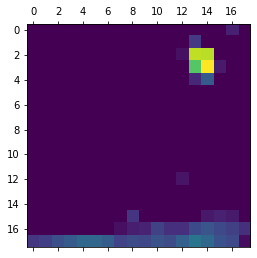

In [ ]:
eight_layer_activation = activations[7]
  
# shape of first layer activation
print(eight_layer_activation.shape)
  
# 6th channel of the image after first layer of convolution is applied
plt.matshow(eight_layer_activation[0, :, :, 1], cmap ='viridis')
  
# 15th channel of the image after first layer of convolution is applied
plt.matshow(eight_layer_activation[0, :, :, 63], cmap ='viridis')

(1, 18, 18, 128)


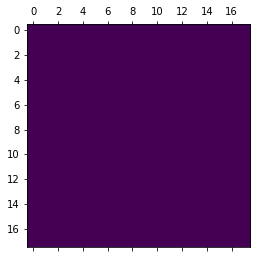

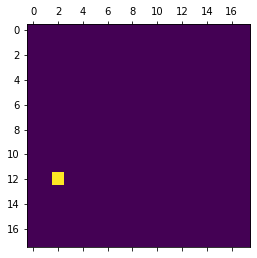

In [ ]:
nine_layer_activation = activations[8]
  
# shape of first layer activation
print(nine_layer_activation.shape)
  
# 6th channel of the image after first layer of convolution is applied
plt.matshow(nine_layer_activation[0, :, :, 1], cmap ='viridis')
  
# 15th channel of the image after first layer of convolution is applied
plt.matshow(nine_layer_activation[0, :, :, 127], cmap ='viridis')

(1, 9, 9, 128)


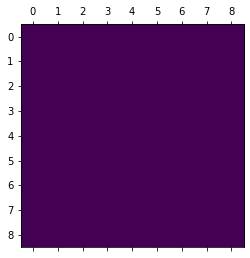

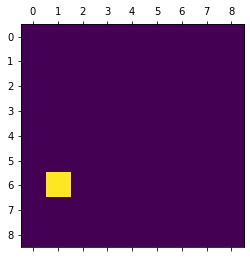

In [ ]:
ten_layer_activation = activations[9]
  
# shape of first layer activation
print(ten_layer_activation.shape)
  
# 6th channel of the image after first layer of convolution is applied
plt.matshow(ten_layer_activation[0, :, :, 1], cmap ='viridis')
  
# 15th channel of the image after first layer of convolution is applied
plt.matshow(ten_layer_activation[0, :, :, 127], cmap ='viridis')

In [ ]:
layer_names = []
  
for layer in model.layers[:8]:
  layer_names.append(layer.name)
print(layer_names)

['conv2d_10', 'max_pooling2d_10', 'conv2d_11', 'max_pooling2d_11', 'conv2d_12', 'max_pooling2d_12', 'conv2d_13', 'max_pooling2d_13']


In [ ]:
c_list = []

In [ ]:
#evaluating the model
train_loss,train_acc = model.evaluate(train_generator,steps = 32)
test_loss,test_acc = model.evaluate(test_generator,steps = 32)
print('train: %.3f, test:%.3f' %(train_acc,test_acc))

KeyboardInterrupt: ignored

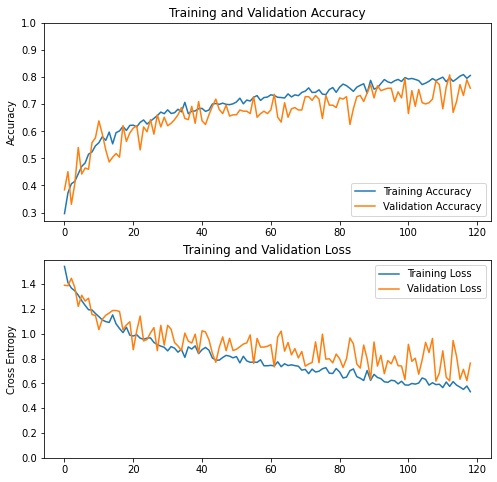

In [ ]:
acc = [0.2959,0.3724,0.4062,0.4149,0.4428,0.4701,0.4831,0.5154,0.5236,0.5463,0.5577,0.5801,0.5665,0.5971,0.5535,0.5949,0.6012,0.6180,0.6029,0.6217,0.6225,0.6162,0.6329,0.6417,0.6266,0.6373,0.6475,0.6578,0.6708,0.6649,0.6791,0.6658,0.6684,0.6814,0.6717,0.7069,0.6646,0.6738,0.6751,0.6835,0.6845,0.6734,0.6783,0.7007,0.7025,0.6994,0.7038,0.6994,0.6983,0.7014,0.7081,0.7223,0.7014,0.7152,0.7117,0.7255,0.7317,0.7139,0.7245,0.7262,0.7346,0.7322,0.7254,0.7246,0.7228,0.7380,0.7268,0.7344,0.7315,0.7433,0.7482,0.7602,0.7433,0.7438,0.7531,0.7371,0.7353,0.7540,0.7614,0.7438,0.7629,0.7741,0.7683,0.7585,0.7474,0.7628,0.7696,0.7754,0.7411,0.7879,0.7557,0.7607,0.7760,0.7910,0.7825,0.7785,0.7865,0.7914,0.7839,0.7981,0.7927,0.7950,0.7914,0.7870,0.7724,0.7776,0.7848,0.7946,0.7870,0.7937,0.7997,0.7830,0.7975,0.7843,0.7932,0.8035,0.8093,0.7955,0.8059]
val_acc = [0.3839,0.4509,0.3304,0.4062,0.5402,0.4420,0.4643,0.4598,0.5580,0.5759,0.6384,0.5893,0.5312,0.4866,0.5042,0.5179,0.5045,0.6205,0.5625,0.5938,0.6116,0.6205,0.5312,0.6161,0.5982,0.6429,0.5893,0.6607,0.6161,0.6518,0.6205,0.6295,0.6429,0.6607,0.6875,0.6473,0.6429,0.6920,0.6295,0.7098,0.6384,0.6250,0.6607,0.6920,0.7188,0.6803,0.6652,0.6964,0.6562,0.6607,0.6607,0.6786,0.6741,0.6741,0.6652,0.7277,0.6518,0.6652,0.6741,0.6652,0.6786,0.7366,0.6518,0.6339,0.7054,0.6518,0.6830,0.6875,0.6786,0.6786,0.7277,0.7277,0.7143,0.7321,0.7188,0.6471,0.7321,0.6964,0.6964,0.6875,0.7232,0.7188,0.7277,0.6250,0.6830,0.7277,0.7321,0.7098,0.7411,0.7723,0.7232,0.7679,0.7500,0.7545,0.7589,0.7589,0.7098,0.7455,0.7232,0.7946,0.6652,0.7500,0.6920,0.7545,0.7054,0.7009,0.7054,0.7188,0.7857,0.7723,0.6830,0.7634,0.8080,0.6696,0.7098,0.7723,0.7321,0.7902,0.7589]
loss = [1.5421,1.4115,1.3677,1.3454,1.3101,1.2664,1.2282,1.1926,1.1912,1.1625,1.1376,1.1106,1.0973,1.0903,1.1517,1.0788,1.0418,1.0086,1.0517,0.9880,0.9813,0.9914,0.9637,0.9550,0.9644,0.9663,0.9294,0.9120,0.8998,0.8903,0.8616,0.8959,0.8833,0.8510,0.8740,0.8091,0.8937,0.8763,0.9016,0.8391,0.8711,0.8892,0.8667,0.8040,0.7874,0.7867,0.8080,0.8252,0.8190,0.8054,0.8158,0.7647,0.8182,0.7808,0.7693,0.7718,0.7689,0.7897,0.7416,0.7416,0.7447,0.7407,0.7736,0.7339,0.7575,0.7432,0.7491,0.7426,0.7380,0.7062,0.7124,0.6780,0.7144,0.6911,0.6973,0.7174,0.7263,0.6819,0.6792,0.7192,0.6912,0.6431,0.6498,0.7016,0.7160,0.6538,0.6407,0.6230,0.7032,0.6242,0.6723,0.6476,0.6377,0.6125,0.6078,0.6245,0.6203,0.5956,0.6166,0.5872,0.5852,0.5988,0.5937,0.6022,0.6434,0.6316,0.5855,0.6048,0.5898,0.5927,0.5654,0.6108,0.5756,0.6139,0.5856,0.5694,0.5511,0.5785,0.5325]
val_loss = [1.3900,1.3860,1.4465,1.3714,1.2199,1.3098,1.2627,1.2857,1.1546,1.1463,1.0331,1.1159,1.1485,1.1666,1.1865,1.1868,1.1786,1.0312,1.0705,1.0959,0.8707,1.0225,1.1420,0.9417,0.9536,1.0066,1.0487,0.8636,1.0669,0.9074,1.0672,1.0356,0.9287,0.9012,0.8626,1.0049,0.9397,0.9249,0.9962,0.8436,1.0232,1.0140,0.9518,0.8417,0.7697,0.8908,0.9741,0.8628,0.9626,0.8645,0.8743,0.8946,0.9165,0.9258,0.9900,0.7597,0.9620,0.8919,0.8921,0.8983,0.9121,0.7322,0.9743,1.0206,0.8592,0.9287,0.8296,0.8798,0.8046,0.8564,0.7385,0.7555,0.7677,0.9338,0.7654,0.9959,0.7945,0.7980,0.7648,0.8359,0.7979,0.7283,0.7981,0.9657,0.9182,0.7565,0.7227,0.9082,0.7975,0.6334,0.9332,0.7390,0.8259,0.6774,0.7831,0.7573,0.8212,0.7421,0.7395,0.6300,0.9141,0.7773,0.8027,0.67363,0.7885,0.9298,0.8480,0.9618,0.6175,0.6834,0.8618,0.6489,0.6199,0.9448,0.8172,0.6332,0.7130,0.6221,0.7626]

# ________________ Graph 1 -------------------------

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

# ________________ Graph 2 -------------------------

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()